### blibliotecas iniciais 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore")

### Blibliotecas para tratamento de imagem

In [3]:
from skimage.color import rgb2gray
from skimage.filters import try_all_threshold, threshold_otsu, threshold_local, gaussian
from skimage.transform import rotate, rescale
from skimage import morphology
import cv2

In [4]:
# G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Early blight
# G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Healthy
# G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Late blight

In [5]:
trainEarly = os.listdir('G:\\Meu Drive\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Early blight')
trainHeal = os.listdir('G:\\Meu Drive\\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Healthy')
trainLate = os.listdir('G:\\Meu Drive\\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Late blight')


In [6]:
print('-----train-----')
print(len(trainHeal))
print(len(trainEarly))
print(len(trainLate))

-----train-----
2432
3532
3521


### Ai decidi Pegar apenas  as 2432 das saudaveis, e metade das Late e metade Early ou seja 1216 cada.

In [7]:
print(round(len(trainHeal)/2 ))
amostLen = round(len(trainHeal)/2)

1216


In [9]:
path1 = 'G:\\Meu Drive\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Early blight' ## não saudavel então pego só 1216
path2 = 'G:\\Meu Drive\\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Healthy' ## saudavel pego todas
path3 = 'G:\\Meu Drive\\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Late blight' ## não saudavel então pego só 1216

### lista onde esta cada cada imagem no google drive 

In [ ]:
# celulas que não precisa rodar
cont = 0
for i in os.listdir(path1):
    cont += 1
    print(path1 + "\\" + i)
    if cont == amostLen:
        break

In [ ]:
# celulas que não precisa rodar

cont = 0
for i in os.listdir(path3):
    cont += 1
    print(path3 + "\\" + i)
    if cont == amostLen:
        break

In [10]:
# Função para mostrar na tela a imagem
def ShowImg(image, title='image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

### Testes para vê se conseguia pegar uma imagem qualquer

In [16]:
img = plt.imread('G:\\Meu Drive\\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Late blight\\PotatoLateBlight(3451).JPG')
#print(img)

In [19]:
print(img.shape)

(256, 256, 3)


In [20]:
letimg = (img, 'PotatoLateBlight(3451).JPG','G:\\Meu Drive\\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Late blight\\PotatoLateBlight(3451).JPG') 

In [30]:
type(letimg)

tuple

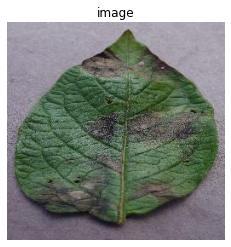

In [32]:
ShowImg(letimg[0])

In [ ]:
img.shape[0] == 256

In [ ]:
img.shape[1] == 256

### analisei as imagens e era melhor pegar apenas com shape de 256 por 256 pix

In [11]:
path1 = 'G:\\Meu Drive\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Early blight' ## não saudavel então pego só 1216
path2 = 'G:\\Meu Drive\\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Healthy' ## saudavel pego todas
path3 = 'G:\\Meu Drive\\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Late blight' ## não saudavel então pego só 1216


In [12]:
early_potato = list()
heal_potato = list()
late_potato = list()

In [13]:
heal_potato

[]

In [14]:
amostLen
amostLen2 = amostLen*2

2432

In [15]:
print("quantidade de amostrar para pegar nas não saudaveis: ", amostLen)
print("quantidade de amostrar para pegar nas saudaveis: ", amostLen2)

quantidade de amostrar para pegar nas não saudaveis:  1216
quantidade de amostrar para pegar nas saudaveis:  2432


### Pegando quantidade de folhas saudaveis e não saudaveis que com tamanho de 256x256 pixels 

In [ ]:
img = tuple()
try:
    for i in os.listdir(path1):
        img = (cv2.imread(path1 + "\\" + i), path1 + "\\" + i, i)
        if (img.shape[0] == 256) and (img.shape[1] == 256): 
            early_potato.append(img)
        if (len(early_potato) >= amostLen):
            break
except Exception as e:
    print(f'Erro {e}')


In [ ]:
# saudaveis pego todas com pixel de 256 por 256
img = tuple()
try:
    for i in os.listdir(path2):
        img = (cv2.imread(path2 + "\\" + i), path2 + "\\" + i, i) 
        if (img.shape[0] == 256) and (img.shape[1] == 256):
            heal_potato.append(img)
except Exception as e:
    print(f"Erro {e}")

In [ ]:
# aqui pego apenas maior igual a quantidade de 1216 folhas
img = tuple()
try:
    for i in os.listdir(path3):
        img = (cv2.imread(path3 + "\\" + i), path3 + "\\" + i, i) 
        if (img.shape[0] == 256) and (img.shape[1] == 256):
            late_potato.append(img)
        if len(late_potato) >= amostLen:
            break
except Exception as e:
    print(f"Erro {e}")

### foram pegas 2432 folhas não saudaveis e 2241 folhas saudaveis todas com o mesmo tamanho 

In [ ]:
heal_potato[2240].shape

In [ ]:
ShowImg(heal_potato[22])

In [ ]:
print("quantidade de folhas meias saudaveis: ", len(early_potato))
print("quantidade de folhas saudaveis: ", len(heal_potato))
print("quantidade de folhas meias saudaveis ", len(late_potato))


In [ ]:
print(len(early_potato)+len(late_potato) - len(heal_potato))

In [ ]:
ShowImg(heal_potato[100], 'Saudavel')
ShowImg(early_potato[100], 'Estagio inicial')
ShowImg(late_potato[100], 'Estado final')


In [ ]:
shape_early = []

In [ ]:
for i in range(len(early_potato)):
    shape_early.append(early_potato[i].shape)

In [ ]:

ShowImg(early_potato[1530])

In [ ]:
# shape[0] e shape[1] iguais a 256

In [ ]:

cont = 0
for i in os.listdir(path2):
    cont += 1
    img = plt.imread(path2 + "\\" + i)
    heal_potato.append(img)

In [ ]:

cont = 0
for i in os.listdir(path3):
    cont +=1
    img = plt.imread(path3 + "\\" + i)
    late_potato.append(img)
    if cont == amostLen:
        break

### Vai ter dois path um para imagem saudavel e um para imagem não saudavel

In [35]:
# Saudavel
path = ''

In [34]:
# não saudavel
path = ''

### class para poder fazer o pre-processamento da imagem

In [33]:
class Processing():
    def __init__(self, img, filename, path):
        self.img = img
        self.filename = filename
        self.path = path

    def corvertHSV(self):
        self.hsv = cv2.cvtColor(self.img, cv2.COLOR_BGR2HSV)
        self.h = self.hsv[:, :, 0]
        self.s = self.hsv[:, :, 1]        
        self.v = self.hsv[:, :, 2]        
        #cv2.imwrite(path + "HSV_" + self.filename, self.hsv)


    # vou testar os três canais antes de decidir qual melhor ...
    # por enquanto vou deixar o canal s
    def equalize(self):
        self.s_equalizado = cv2.equalizeHist(self.s)
        self.hls[:,:,1] = self.s_equalizado
        cv2.imwrite(path+"s_eq" + self.filename, self.hsv)

    def convertRGB(self):
        self.img_out = cv2.cvtColor(self.hsv, cv2.COLOR_HLS2BGR)

    def saveImg(self):
        cv2.imwrite(path + "preProcess" + self.filename, self.img_out)

    

In [38]:
img.shape

(256, 256, 3)

In [39]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

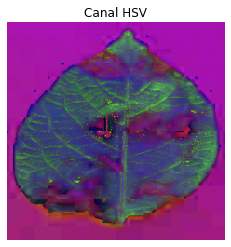

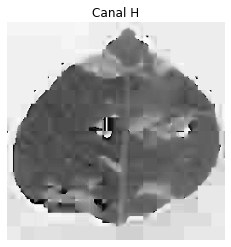

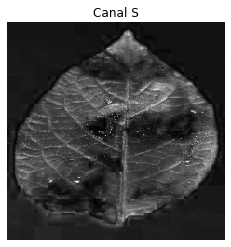

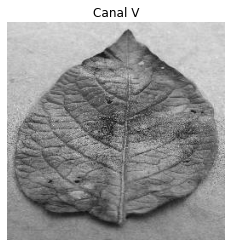

In [48]:
ShowImg(img_hsv[:,:,:], 'Canal HSV') # canal HSV total
ShowImg(img_hsv[:,:,0], 'Canal H') # canal H 
ShowImg(img_hsv[:,:,1], 'Canal S') # canal S Saturação
ShowImg(img_hsv[:,:,2], 'Canal V') # canal V Valor


### Tratamento HLS

In [49]:
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

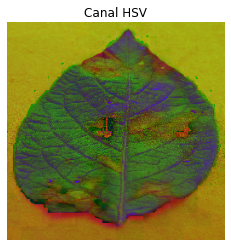

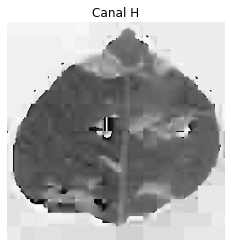

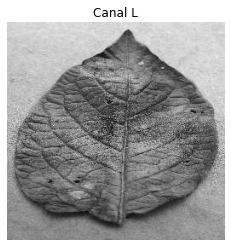

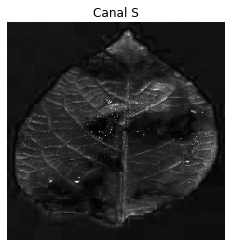

In [50]:
ShowImg(img_hls[:,:,:], 'Canal HSV') # canal HSV total
ShowImg(img_hls[:,:,0], 'Canal H') # canal H 
ShowImg(img_hls[:,:,1], 'Canal L') # canal L Luminosidade
ShowImg(img_hls[:,:,2], 'Canal S') # canal S Saturação


# Notei que já separou as imagens e quantificou. Porem, ainda para tratar as imagens deixa tudo na mesma pasta inicialmente, somente separando as classes, inclusive porque voce não finalizou os experimentos com a extração de características.

# Agora as etapas de execução:
- Inserir aqui experimentos separando de cada canal de cor. Exemplo exibir a imagem do H, do S e do L e depois imagem do H, do S e do V. Não precisa ser de cada pasta de treino e validação, como voce vai juntar tudo inicialmente, faz 1 experimento de cada classe so. 

- Verificar o canal que mais tem contorno, sem tantas misturas de cores. 
- Realizar a equalização do histograma nesse canal separado
- juntar a imagem novamente para formar nova imagem e retornar para RGB. 

- Após isso, voce irá iniciar a extração de características. 
- indico usar inicialmente como extrator de características o SIFT. 
https://www.dominodatalab.com/blog/feature-extraction-and-image-classification-using-deep-neural-networks 

Somente após isso, siga para os experimentos com aprendizagem de máquina. 
Finalize esses passos acima e me avise para iniciarmos os treinamentos.